In [1]:
from gait_analysis import CasiaDataset, settings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from torch.utils.data import DataLoader
from torchvision import utils

warnings.filterwarnings('ignore')

%matplotlib inline  


# Configure a dataset aggregation of input/labels

We can change the quickly the indexing to access all the angles

In [2]:
from gait_analysis.Config import Config
c = Config()
c.config['indexing']['grouping'] = 'person_sequence_angle'
c.config['pose']['load'] = True
c.config['flow']['load'] = True
c.config['heatmaps']['load'] = True


loading configuration  default


Define the dataset_output 

In [3]:
c.config['dataset_output'] = {
        'data': ["scenes","flows","heatmaps"],
        'label': "annotations"}

Plain and untransformed dataset

In [4]:
dataset_3 = CasiaDataset()

In [5]:
item, labels = dataset_3[1]
scenes = item['scenes']
flows = item['flows']
print(item.keys())

dict_keys(['scenes', 'flows', 'heatmaps'])


# Using the composer to construct reusable transformers

In [6]:
from gait_analysis import Composer

composer = Composer()
transformer = composer.compose()
print(transformer)

In [7]:
print(c.get_indexing_grouping())
test_item, labels = dataset_3[0]

person_sequence_angle


just to test we include add a field annotations 


In [8]:
test_item['annotations'] = labels
transformed_item = transformer(test_item)
print('==> transformed item is: ',test_item.keys())

(480, 640, 3)
(480, 640, 3)
==> transformed item is:  dict_keys(['scenes', 'flows', 'annotations', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])


In [9]:
item.keys()

dict_keys(['scenes', 'flows', 'heatmaps'])

# Using the transformer and the dataset_output specifications

Printing some samples of the transformed dataset

In [10]:
c.config['dataset_output'] = {
        'data': ["scenes","flows","heatmaps_LAnkle","heatmaps_RAnkle"],
        'label': "annotations"}
transformed_dataset = CasiaDataset(transform=transformer)

for i in range(len(transformed_dataset)):
    print('i: ', i)
    sample, labels = transformed_dataset[i]

    print(i, sample.keys())
    print(labels.size())

    if i == 5:
        break

i:  0
(480, 640, 3)
(480, 640, 3)
0 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([52])
i:  1
(480, 640, 3)
(480, 640, 3)
1 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([52])
i:  2
(480, 640, 3)
(480, 640, 3)
2 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([52])
i:  3
(480, 640, 3)
(480, 640, 3)
3 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([52])
i:  4
(480, 640, 3)
(480, 640, 3)
4 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([52])
i:  5
(480, 640, 3)
(480, 640, 3)
5 dict_keys(['scenes', 'flows', 'heatmaps_LAnkle', 'heatmaps_RAnkle'])
torch.Size([60])


# Dataloader: using the transformed dataset with the transformer to create a training set

In [11]:
# dataloader = DataLoader(transformed_dataset, batch_size=4,
#                         shuffle=True, num_workers=4)
dataloader = DataLoader(transformed_dataset, batch_size=5)

#### DEV: The problem is that the dimensions of the label are different for some of the videos. In this case the aggregation works for all the angles in the video but no arbitrary batch_size will work

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
plotting sample flow chunck
im_size =  torch.Size([5, 3, 480, 640])
batch_size =  5


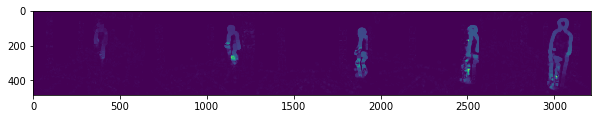

plotting sample scene chunck


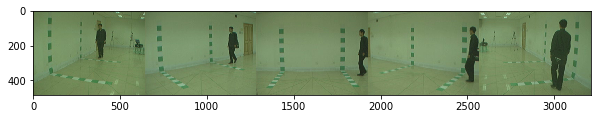

plotting sample scene chunck
hmap.shape =  (5, 480, 640)
<class 'list'>


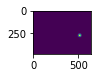

In [12]:
def plot_flows(inputs):
    flows = inputs['flows']
    print('plotting sample flow chunck')
    flow = flows[0]
    batch_size = flow.size(0)
    im_size = flow.size()
    print('im_size = ', im_size)
    print('batch_size = ', batch_size )
    grid = utils.make_grid(flow)
    plt.figure(figsize=(10,50))
    plt.imshow(grid.numpy()[2,:,:])
    plt.show()
    
def plot_scenes(inputs):
    scenes = inputs['scenes']
    print('plotting sample scene chunck')
    scene = scenes[0]
    grid = utils.make_grid(scene)
    plt.figure(figsize=(10,50))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.show()
    
def plot_heatmap(inputs):
    hmaps = inputs['heatmaps_LAnkle']
    print('plotting sample scene chunck')
    hmap = hmaps[0].numpy()
    print('hmap.shape = ',hmap.shape)
    plt.figure(figsize=(10,50))
    plt.subplot(151)
    plt.imshow(hmap[1,:,:])
    plt.subplot(152)
    plt.imshow(hmap[1,:,:])
    plt.subplot(153)
    plt.imshow(hmap[1,:,:])
    plt.subplot(154)
    plt.imshow(hmap[1,:,:])
    plt.subplot(155)
    plt.imshow(hmap[1,:,:])
    

    
    
    
for i_batch, sample_batched in enumerate(dataloader):
    # observe 4th batch and stop.
    if i_batch == 0:
        inputs, labels = sample_batched
        plot_flows(inputs)
        plot_scenes(inputs)
        plot_heatmap(inputs)
        print(type(sample_batched))
        break

In [13]:
a = np.eye(400)

a.resize((1,400,400))
a.shape

(1, 400, 400)